# Generating intermodal graph and calculating accessibility matrix

BlocksNet uses [IduEdu](https://github.com/DDonnyy/IduEdu) network library to generate city intermodal graph and calculate the accessibility matrix.

In [1]:
import os
import geopandas as gpd

data_path = "./data"

## Read blocks and initialize processor instance

In [2]:
from blocksnet import AccessibilityProcessor

blocks = gpd.read_parquet(os.path.join(data_path, 'blocks.parquet'))
ap = AccessibilityProcessor(blocks)

## Generate an intermodal city graph

In [3]:
graph = ap.get_intermodal_graph()

Parsing pt routes:   0%|          | 0/1252 [00:00<?, ?it/s]

/home/vasilstar/masterplanning/.venv/lib/python3.10/site-packages/shapely/linear.py:90: RuntimeWarning: invalid value encountered in line_locate_point
  return lib.line_locate_point(line, other)


Calculating the weights of the walk graph:   0%|          | 0/1146286 [00:00<?, ?it/s]

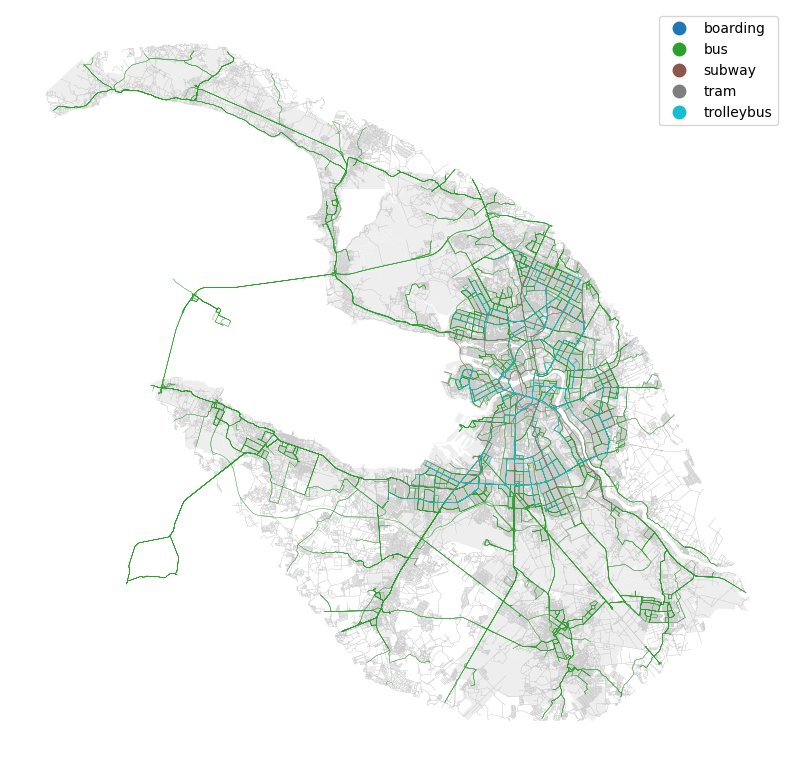

In [4]:
ap.plot(blocks, graph)

## Calculate the accessibility matrix

In [5]:
acc_mx = ap.get_accessibility_matrix(graph)
acc_mx.head()

,0,1,2,3,4,5,6,7,8,9,...,16310,16311,16312,16313,16314,16315,16316,16317,16318,16319
0,0.000000,18.718750,9.234375,17.21875,30.296875,27.390625,30.671875,23.281250,78.6875,81.2500,...,76.5625,102.5625,97.5000,132.250,130.8750,142.125,247.625,228.625,247.625,124.6250
1,17.859375,0.000000,19.015625,7.65625,20.281250,25.250000,25.234375,15.765625,76.8750,79.4375,...,74.6875,100.7500,95.6875,130.500,129.0000,140.250,245.875,226.875,245.875,112.5000
2,9.234375,20.796875,0.000000,20.21875,27.968750,25.062500,28.343750,20.953125,71.8750,74.4375,...,69.7500,95.8125,90.6875,125.500,124.0625,135.375,240.875,221.875,240.875,124.6250
3,15.937500,7.449219,18.421875,0.00000,21.109375,24.984375,27.781250,16.593750,76.3125,78.8125,...,74.1250,100.1875,95.0625,129.875,128.5000,139.750,245.250,226.250,245.250,113.3750
4,31.906250,19.765625,31.734375,21.28125,0.000000,21.781250,23.125000,15.429688,89.5625,92.1250,...,87.4375,113.5000,108.3750,143.125,141.7500,153.000,258.500,239.500,258.500,108.3125


In [6]:
acc_mx.to_pickle(os.path.join(data_path, 'acc_mx.pickle'))